# Ejemplo 2 de regresión

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Datos de entrenamiento

In [2]:
# 1 millon de datos
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5*x_data)+5+noise

In [3]:
my_data = pd.concat(
    [pd.DataFrame(data=x_data,columns=['X Data']),
     pd.DataFrame(data=y_true,columns=['Y'])]
    ,axis=1)

In [5]:
my_data.head()

,X Data,Y
0,0.00000,5.724433
1,0.00001,3.684645
2,0.00002,4.669615
3,0.00003,4.684519
4,0.00004,5.774056


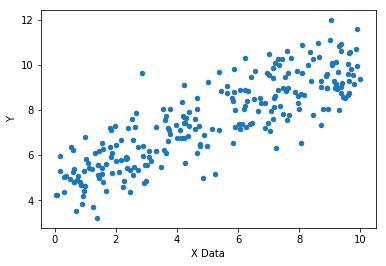

In [6]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Tensorflow

In [7]:
# tamaño del batch
batch_size = 10

### Variables

In [8]:
a = tf.Variable(0.5)
b = tf.Variable(1.0)

Instructions for updating:
Colocations handled automatically by placer.


### Placeholders

In [11]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

### Graph

In [12]:
y_model = a*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))

### Optimizador

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [15]:
init = tf.global_variables_initializer()

### Session

In [21]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
        if i%100 == 0:
            print(sess.run(error, feed_dict=feed))
    model_a, model_b = sess.run([a,b])

82.89781
46.675777
24.820835
19.515537
6.8930864
7.2362385
6.8376217
6.591069
8.673049
7.6943116


In [18]:
model_a

0.53134507

In [19]:
model_b

5.03063

### Resuts

In [22]:
y_hat = x_data * model_a + model_b

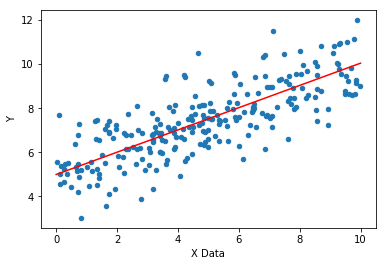

In [23]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data, y_hat, 'r')